In [215]:
import numpy as np
import pandas as pd
import os

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import random

In [217]:
data = pd.read_csv('fake_job_postings.csv')

In [218]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [220]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [221]:
#check missing values and replace them with blank
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [222]:
columns=['job_id','telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

In [223]:
data.fillna(' ', inplace=True) #adding blank
data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [224]:
data.shape

(17880, 12)

In [225]:
data.isnull().sum() #no more null values in dataset

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [226]:
#real and fake visualization
data.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

,fraudulent,title
0,0,17014
1,1,866


In [227]:
#Visualize Job postings by countries 

def split(location):
  l =location.split(',')
  return l[0]     #country,city,location split

data['country'] =data.location.apply(split)  

In [228]:
data['country'].nunique()

91

In [229]:
data['country'].value_counts()[:11]

US    10656
GB     2384
GR      940
CA      457
DE      383
        346
NZ      333
IN      276
AU      214
PH      132
NL      127
Name: country, dtype: int64

Text(0, 0.5, 'Number of Jobs')

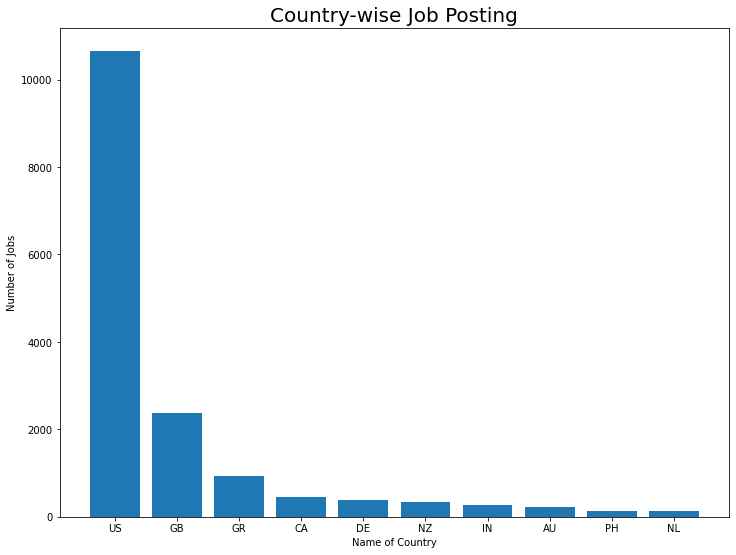

In [230]:
country =dict(data.country.value_counts()[:11])

del country[' ']
plt.figure(figsize=(12,9))

plt.title('Country-wise Job Posting',size=20)
plt.bar(country.keys(),country.values())

plt.xlabel('Name of Country')
plt.ylabel('Number of Jobs')

In [231]:
#Most Common Job titles in US.............


most_common_jobs = data[data["location"] == "US"]['title'].value_counts().idxmax()
print(most_common_jobs)


Customer Service Associate 


Text(0, 0.5, 'Number of Jobs')

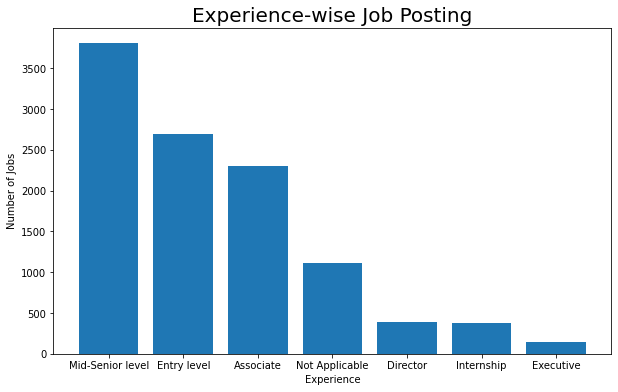

In [232]:
# Visualize Job posting by Experience 

experience =dict(data.required_experience.value_counts()[:11])

del experience[' ']
plt.figure(figsize=(10,6))

plt.title('Experience-wise Job Posting',size=20)
plt.bar(experience.keys(),experience.values())

plt.xlabel('Experience')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

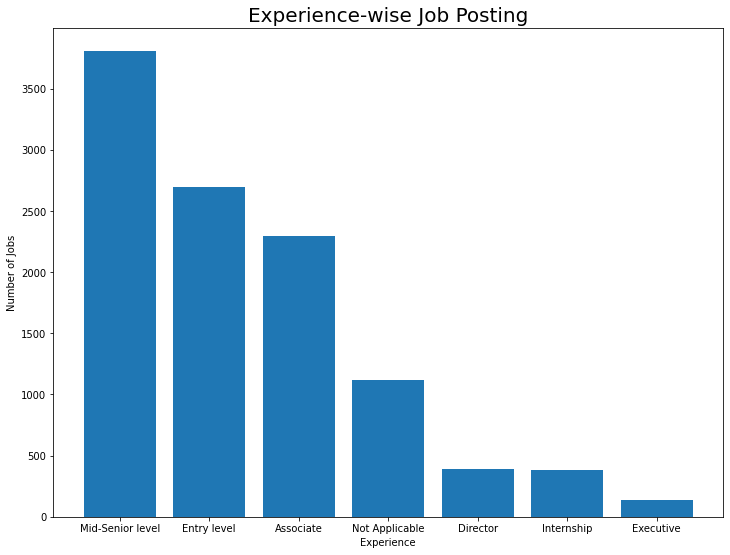

In [233]:
# Visualize Job posting by Experience 

experience =dict(data.required_experience.value_counts()[:11])

del experience[' ']
plt.figure(figsize=(12,9))

plt.title('Experience-wise Job Posting',size=20)
plt.bar(experience.keys(),experience.values())

plt.xlabel('Experience')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

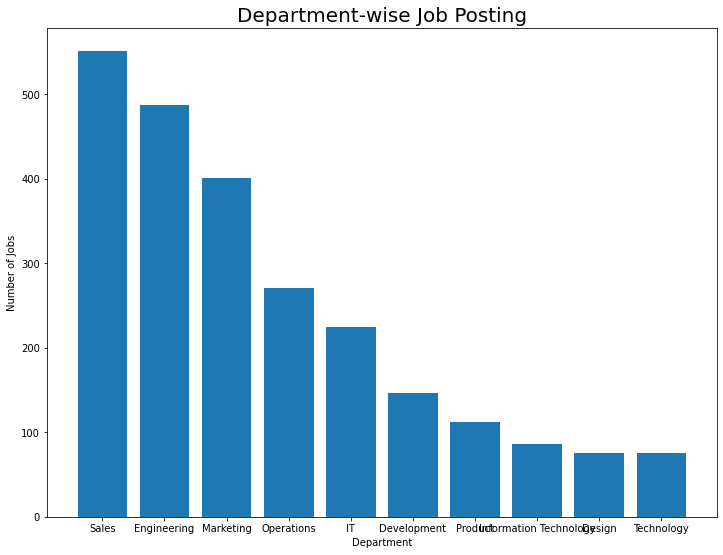

In [234]:
# Visualize Job posting by Department

department1 =dict(data.department.value_counts()[:11])

del department1[' ']
plt.figure(figsize=(12,9))

plt.title('Department-wise Job Posting',size=20) 
plt.bar(department1.keys(),department1.values())

plt.xlabel('Department')
plt.ylabel('Number of Jobs')

In [235]:
# TO find the fake job titles

data.title.value_counts()[:11]



English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [236]:
data[data.fraudulent == 1].title.value_counts()[:11] #fake jobs

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Name: title, dtype: int64

In [237]:
data[data.fraudulent == 0].title.value_counts()[:11] #real

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Name: title, dtype: int64

In [238]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [239]:
#combine text in a single column to start cleaning our data
data['text'] = data['title'] + ' '+ data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' '+ data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']

In [240]:
del data['country']


In [241]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [242]:
!pip install wordcloud

In [243]:
# Check the frequency of Word in datsets

from wordcloud import WordCloud
all_words = ' '.join([text for text in data['text']])

In [244]:
wordcloud = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(all_words)

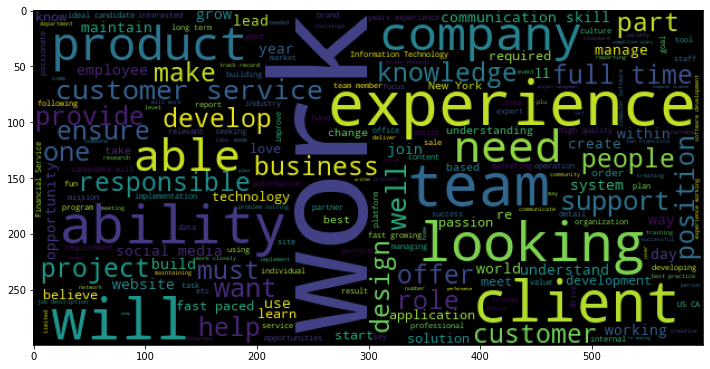

In [245]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud)
plt.show()

In [246]:
# frequency of word in real posting of jobs
real_post = ' '.join([text for text in data['text'][data['fraudulent']==0]])

In [247]:
wordcloud1 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(real_post)

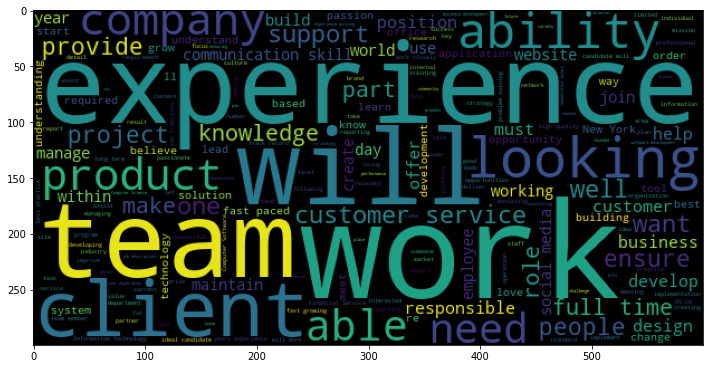

In [248]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud1)
plt.show()

In [249]:
# frequency of word in fake job postings
fake_post = ' '.join([text for text in data['text'][data['fraudulent'] == 1]])

In [250]:
wordcloud2 = WordCloud(width = 600 ,height = 300, max_font_size = 120).generate(fake_post)

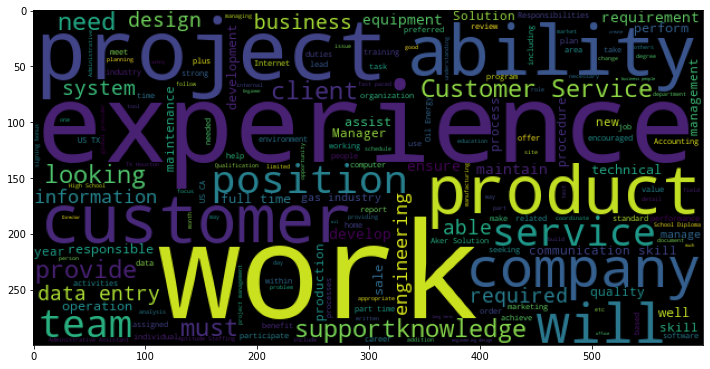

In [251]:
plt.figure(figsize =(12,9))

plt.imshow(wordcloud2)
plt.show()

In [252]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anupam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [253]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [254]:
stop_words = set(stopwords.words("english"))

In [255]:
data['text'] = data['text'].apply(lambda x:x.lower())

In [256]:
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [257]:
data['text'][0]

"marketing intern us, ny, new york marketing we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging exi

In [258]:
#train test phase
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(data.text, data.fraudulent ,test_size =0.3)

In [259]:
from sklearn.feature_extraction.text import CountVectorizer

In [260]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [261]:
# Convert the text data into vector format 
X_train_dtm = vect.transform(X_train)

In [262]:
X_train_dtm

<12516x86515 sparse matrix of type '<class 'numpy.int64'>'
	with 2328751 stored elements in Compressed Sparse Row format>

In [263]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [264]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86515 sparse matrix of type '<class 'numpy.int64'>'
	with 971202 stored elements in Compressed Sparse Row format>

In [265]:
# Naive Bayes Classifier 

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [266]:
y_pred_nb = nb.predict(X_test_dtm)

In [267]:
accuracy_score(y_test,y_pred_nb)

0.9742729306487695

In [268]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [269]:
y_pred_dt = dt.predict(X_test_dtm)

In [270]:
accuracy_score(y_test,y_pred_dt)

0.9793064876957495

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [272]:
y=data.fraudulent
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


In [273]:
X=data.drop('fraudulent',1)
print(X.head())

                                                text
0  marketing intern us, ny, new york marketing we...
1  customer service - cloud video production nz, ...
2  commissioning machinery assistant (cma) us, ia...
3  account executive - washington dc us, dc, wash...
4  bill review manager us, fl, fort worth spotsou...


C:\Users\Anupam\AppData\Local\Temp\ipykernel_10324\1407801117.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('fraudulent',1)


In [274]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12516, 1) (12516,)
Test set: (5364, 1) (5364,)


In [275]:
input_text = ['general laborers us, ct, hartford elite environmental group llc. provides staffing services temporary employment opportunities wide range clients, business owners search employees, candidates search employment environmental, construction industry. elite environmental group currently hiring general laborers, construction, housekeeping, manufacturing associates temporary temporary hire positions, paying $9.00 - $13.00 per hour. you’re dependable looking work, contact elite environmental group today. job descriptionconstruction erect dismantle scaffolding, shoring, braces, traffic barricades, ramps, temporary structuresmanufacturing associate receive count stock items, record data manually using computer.general labor clean prepare construction sites eliminate possible hazards.pack unpack items stocked shelves stockrooms, warehouses, storage yards.housekeeper clean guest rooms common areasmark stock items using identification tags, stamps, electric marking tools, labeling equipment. ideal candidatesrelevant experience preferredreliable transportationcommitted safety timesexcellent attendance']

In [276]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category")  

This advertisement belonging to real job post category


In [277]:
input_text = ['Data Entry Admin/Clerical Positions - Work From Home ']

In [278]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category")  

This advertisement belonging to fake job post category


In [279]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing

In [280]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_dt))

Classification Accuracy: 0.9108873974645787
Classification Report

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5095
           1       0.04      0.04      0.04       269

    accuracy                           0.91      5364
   macro avg       0.50      0.50      0.50      5364
weighted avg       0.90      0.91      0.91      5364

Confusion Matrix

[[4876  219]
 [ 259   10]]


Text(69.0, 0.5, 'Truth')

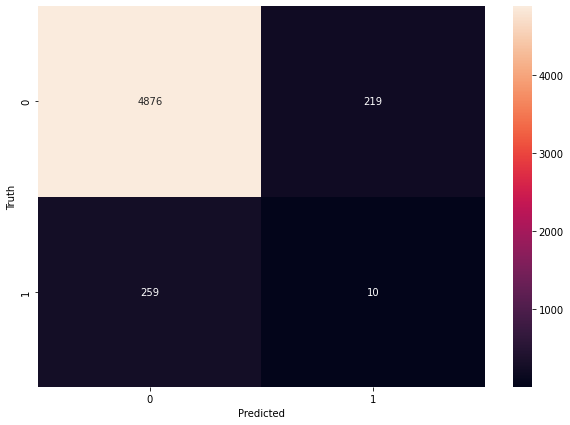

In [281]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred_dt)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')